In [2]:
# install.packages("data.table", "./Rpackages")
install.packages("sf", "./Rpackages")

Warning message in install.packages("sf", "./Rpackages"):
“installation of package ‘sf’ had non-zero exit status”


In [4]:
getwd()

[1] "/media/sf_geocomputation_class/forestmap"

In [5]:
library(data.table, lib.loc = "./Rpackages")
library(sf, lib.loc = "./Rpackages")

In [ ]:
lucas_raw <- read.csv("./in_data/LUCAS/ES_2018_20200213.CSV")

In [ ]:
dim(lucas_raw)

In [ ]:
names(lucas_raw)

In [11]:
table(lucas_raw$LC1_SPEC)


          8  B19a  B19b  B19c  B19d  B23a  B23b  B23d  B23e  B23k  B23n  B35a 
    1 15603    20    84    14     2     2     5    18     2     1    23     3 
 B35d  B35n  B37c  B37d  B37e  B37f  B43a  B43b  B43c  B43e  B43h  B43z  B53a 
   22     1     1     3     1     4    27     7     2     8    12     1     5 
 B53c  B53i  B53j  B53k  B75a  B75h  B75i  B75k  B75p  B75r  B83a  B83f  B84a 
    4    18     2    11     2     4     2    21    50    19     5     1     1 
 B84b  B84k  B84m  C101  C102  C104  C105  C106  C107  C108  C10B  C10C  C10D 
    4     2     5     5   373    57   376   151    16    10     5    38  1131 
 C10Z  C211  C212  C215  C21D  C221  C222  C223  C231  C232  C311  C312  C321 
    1     2   339     1     3    29  2382     1     1   154     3   209     6 
 C322  C32D  C331  C332  C335  C33B  C33C  C33D  C33E  C33Z 
 1129     3     6   615     2     2     1    11     1     1 

In [12]:
table(substr(lucas_raw$LC1,1,1) == "C")


FALSE  TRUE 
16023  7064 

In [18]:
head(lucas_raw[,c('OBS_TYPE','LC1','LC1_SPEC','LC1_PERC','LC2','LC2_SPEC','LC2_PERC','LU1','LU1_TYPE','LU1_PERC','LU2','LU2_TYPE','LU2_PERC','PARCEL_AREA_HA','TREE_HEIGHT_SURVEY','TREE_HEIGHT_MATURITY','FEATURE_WIDTH')])

,OBS_TYPE,LC1,LC1_SPEC,LC1_PERC,LC2,LC2_SPEC,LC2_PERC,LU1,LU1_TYPE,LU1_PERC,LU2,LU2_TYPE,LU2_PERC,PARCEL_AREA_HA,TREE_HEIGHT_SURVEY,TREE_HEIGHT_MATURITY,FEATURE_WIDTH
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,B16,8,95,8,8,0,U111,8,100,8,8,0,4,8,8,8
2,1,E20,8,100,8,8,0,U370,8,100,8,8,0,1,8,8,8
3,1,C10,C10D,100,8,8,88888,U120,8,100,8,8,88888,5,2,2,2
4,1,B16,8,1,8,8,88888,U111,8,100,8,8,88888,4,8,8,8
5,1,B14,8,50,E30,8,10,U111,8,100,8,8,88888,5,8,8,8
6,1,C22,C222,100,8,8,0,U120,8,100,8,8,0,5,2,2,2


In [34]:
a <- st_as_sf(lucas_raw[!is.na(lucas_raw$TH_LAT), c('SURVEY_DATE', 'TH_LAT','TH_LONG','LC1', 'LC1_PERC', 'LC2', 'LC2_PERC')], coords=c("TH_LONG","TH_LAT"), crs= "+proj=longlat")

a$forest <- substr(a$LC1,1,1) == "C"
a$forestperc <- NA
a$forestperc[substr(a$LC1,1,1) == "C"] <- a$LC1_PERC[substr(a$LC1,1,1) == "C"] 
a$forestperc[substr(a$LC2,1,1) == "C"] <- a$LC2_PERC[substr(a$LC2,1,1) == "C"] 


In [42]:
table(substr(a$SURVEY_DATE, 7,8))


   18    19 
23058    28 

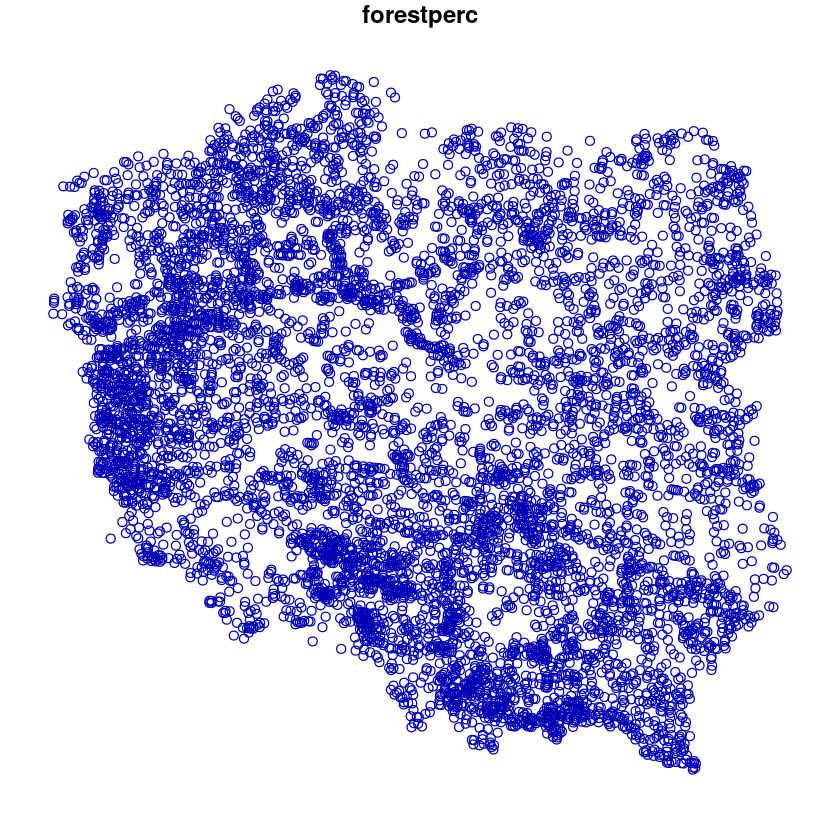

In [38]:
plot(a[a$forest,'forestperc'])

In [50]:
st_write(a, './in_data/LUCAS/LUCAS_forest.geojson')

Writing layer `LUCAS_forest' to data source 
  `./in_data/LUCAS/LUCAS_forest.geojson' using driver `GeoJSON'
Writing 23086 features with 3 fields and geometry type Point.
